References: https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# reading and looking at dataset 
df = pd.read_csv("haberman.csv")
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#information of dataset 
df.info()
#306 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


It has 306 data points and 4 columns

In [5]:
#looking at class - balance
df.status.unique()

array([1, 2], dtype=int64)

It has two unique class values -> 1 and 2 

In [6]:
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
df.shape

(306, 4)

In [8]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

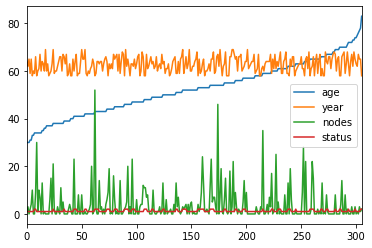

In [9]:
# just tried plot like that to see what happens..!!
df.plot()

C:\Users\ehadnid\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


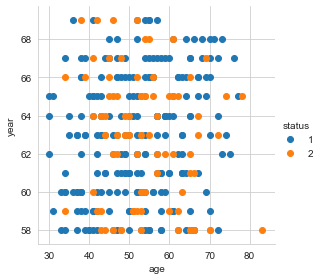

In [10]:
# to confirm if age and year can separate the classes 1 ,2 ?
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4).map(plt.scatter, "age", "year").add_legend();
plt.show();
# seems NO !!

In [11]:
#i want to check null values - this is not right way !!
df.isnull().count()

age       306
year      306
nodes     306
status    306
dtype: int64

In [12]:
#no null values in dataset
df.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

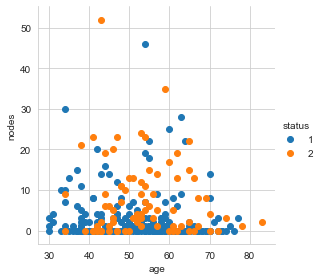

In [13]:
##Lets try to find the important variable for classification 
# I thought lets see if age and nodes only separate status well ? then we dont need year of operation?
# But it looks likee status is not separated well by these two features.
sns.FacetGrid(df, hue="status", size=4).map(plt.scatter, "age", "nodes").add_legend();
plt.show();

C:\Users\ehadnid\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ehadnid\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


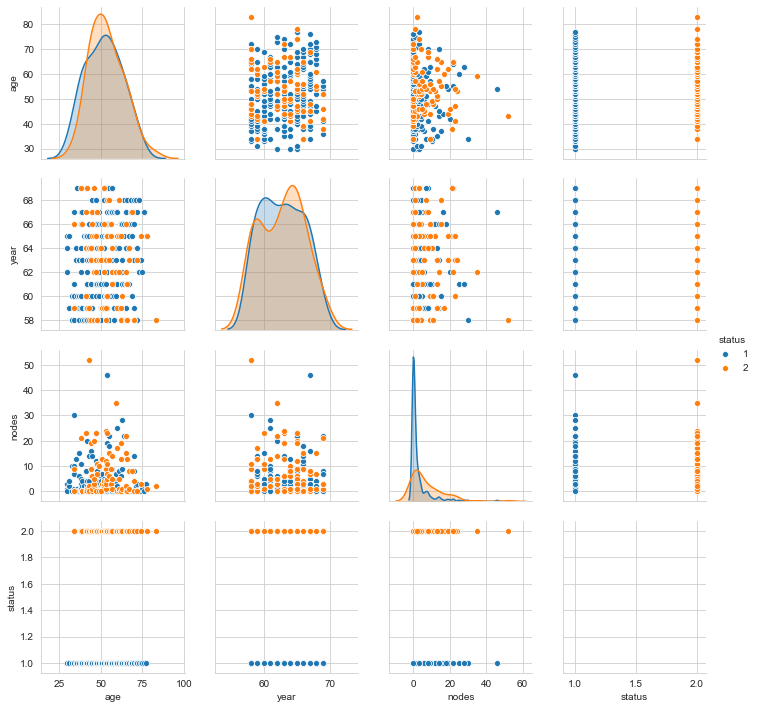

In [14]:
#Trying pairplot between all features to know if some pair seems to separate classes better than others 
sns.pairplot(df, hue="status")

In [15]:
#as i saw status column in df is confusing me from pair plot - i am removing it for a moment 
df_new = df.drop("status", axis=1)

KeyError: 'status'

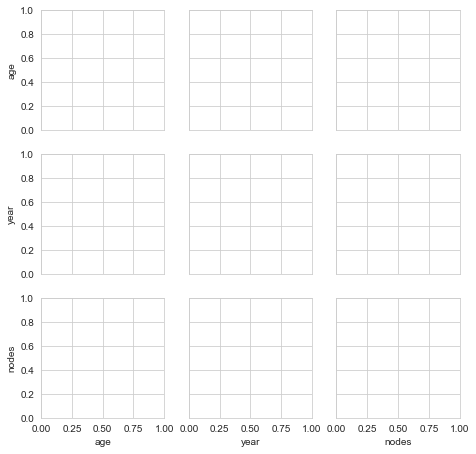

In [16]:
#and i realized that status column was required for hue hence not removing it 
sns.pairplot(df_new, hue="status")

In [ ]:
#Trying pairplot between all features to know if some pair seems to separate classes better than others 
sns.pairplot(df, hue="status")

#Now i realize and ask why it was gaussion pdf sort of graph for a feature vs that feature itself !!??????
??? dont know


In [17]:
#Lets see data distribution now 

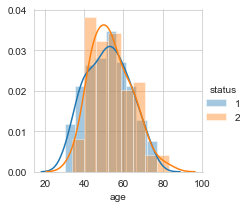

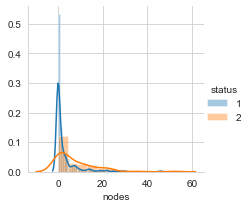

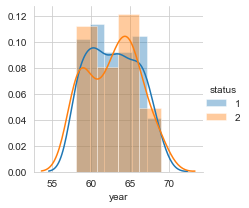

In [18]:
#4 columns plotting them separately 
# none of columns seem to be separating survival status well as alone
# age is gaussian distributed,
sns.FacetGrid(df, hue="status").map(sns.distplot, "age").add_legend()
sns.FacetGrid(df, hue="status").map(sns.distplot, "nodes").add_legend()
sns.FacetGrid(df, hue="status").map(sns.distplot, "year").add_legend()


## Ques?? i dont know how to put these graphs in a 2,2 grid ?????

age range lie between 30 to 90, most of the people who go operated were from 50 to 60, its a gaussian sort of distribution 
then lets find mean and std dev


In [30]:
## lets see if any of column is linearly related with status output variable
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["age"], df["status"])
corr2, p_value1 = pearsonr(df["year"], df["status"])
corr3, p_value2 = pearsonr(df["nodes"], df["status"])

In [31]:
#There is no linear correlation with class label variable
print(corr)
print(corr2) 
print(corr2) 

0.06795032439910399
-0.004768180171165735
-0.004768180171165735


In [32]:
from scipy.stats import spearmanr
print(spearmanr(df["age"], df["status"]))
print(spearmanr(df["year"], df["status"]))
print(spearmanr(df["nodes"], df["status"]))

SpearmanrResult(correlation=0.05591412129628035, pvalue=0.32963096234037237)
SpearmanrResult(correlation=-0.007536484419944706, pvalue=0.8955404094549511)
SpearmanrResult(correlation=0.3270808899002223, pvalue=4.625031416859101e-09)


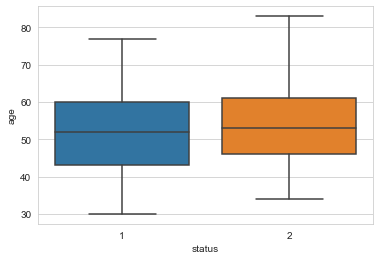

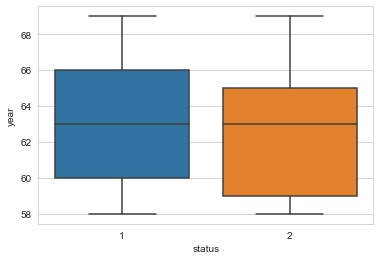

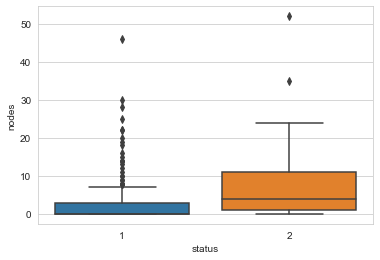

In [35]:
# Drawing box plots - to see if there are outliers, quertiles in data, 
# Though i have seen them from distplot too, lets see how boxplot differs?
# References : https://seaborn.pydata.org/generated/seaborn.boxplot.html

# The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
#except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

#his function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, 
#even when the data has a numeric or date type.


sns.boxplot(x='status',y='age',data=df)
plt.show()
sns.boxplot(x='status',y='year',data=df)
plt.show()
sns.boxplot(x='status',y='nodes',data=df)
plt.show()

#nodes field has outliers, age and year do not have outliers 

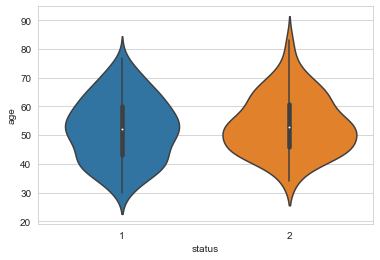

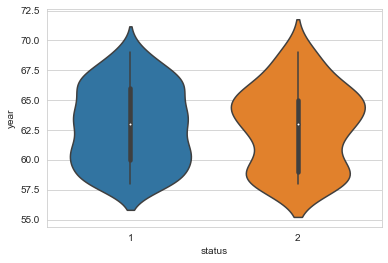

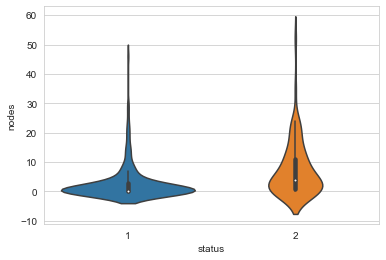

In [44]:
#A violin plot plays a similar role as a box and whisker plot. 
#It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

#Unlike a box plot, in which all of the plot components correspond to actual datapoints, 
#the violin plot features a kernel density estimation of the underlying distribution.

#sns.FacetGrid(df, hue="status").map(sns.distplot, "age").add_legend()
#sns.FacetGrid(df, hue= "status").map(sns.violinplot, "age").add_legend()

sns.violinplot(x="status", y="age", data = df,height = 10)
plt.show()
sns.violinplot(x="status", y="year",data = df,height = 10)
plt.show()
sns.violinplot(x="status", y="nodes",data = df,height = 10)
plt.show()



Observations:
1. it is showing pdf which i saw in distplot and a view like box plot too both in one plot 
2. more than 5 nodes there is almost no chance of survival
3. Most of the patients had number of nodes = 0 had survived too
4. A little more than 1 node were maximum number of patients that did not survive
5. year 65 most of people were operated did not survive
6. It looks like other than nodes none other field alone is classifying the classes well as alone parameter.
